In [1]:
#Importing the libraries
import cv2
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPool2D, Activation, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

Using TensorFlow backend.


In [31]:
#Setting the directories paths
train_directory = './train'
test_directory = './test'

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


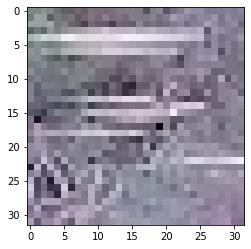

In [17]:
#plot the first image
img = cv2.imread('train/0004be2cfeaba1c0361d39e2b000257b.jpg')
plt.imshow(img)

In [28]:
#Define our ImageGenrator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [32]:
df['has_cactus'] = df['has_cactus'].astype(str)

train_generator = train_datagen.flow_from_dataframe(
    df,
    directory = train_directory,
    subset = 'training',
    x_col = 'id',
    y_col = 'has_cactus',
    target_size = (32,32),
    class_mode = 'binary'
)
val_generator = train_datagen.flow_from_dataframe(
    df,
    directory = train_directory,
    subset = 'validation',
    x_col = 'id',
    y_col = 'has_cactus',
    target_size = (32,32),
    class_mode = 'binary'
)

Found 14875 validated image filenames belonging to 2 classes.
Found 2625 validated image filenames belonging to 2 classes.


In [33]:
#Defining our Model
model = Sequential()

model.add(Conv2D(32, (3,3) ,activation = 'relu', input_shape = (32,32,3)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [50]:
import PIL
#Compile our model
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(), 
    metrics = ['accuracy']
)

In [ ]:
#Fitting the Model
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 2000,
    epochs = 10,
    validation_data = val_generator,
    validation_steps = 64
)